Part a) We know that the mean of bean type A is 5 grams with a sd of 2 which is greater than the mean of bean type B 4 grams with a sd of 1.4. Our classifier is determined by a weight threshold T. Therefore, we can say that if the weight lies between T and +∞ then it is classified as bean type A and if the weight lies between -∞ and T then it is classified as type B. 

The probability of misclassifying a point as bean type A when it is bean type B is the probability density of bean type B in the interval T and +∞ 
T∫+∞ pB(x)dx = T∫+∞p4,1.4(x)dx

Here, T is on the left of the integral sign which is the lower bound +∞ is on the right side which is the upper bound.
           

Similarly, the probability of misclassifying a point as bean type B when it is bean type A is the probability density of bean type A in the interval -∞ and T.
          
 -∞∫T pA(x)dx = -∞∫T p5,2(x)dx

Here, -∞ is on the left of the integral sign which is the lower bound T is on the right side which is the upper bound.

Part b)

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [ ]:
# We will create functions for the probability distributions of A and B.

def pA(x):
    meanA = 5
    sdA = 2
    return (1 / (sdA * np.sqrt(2 * np.pi))) * np.exp(-(1/(2*sdA)) * ((x - meanA) ** 2))


def pB(x):
    meanB = 4
    sdB = 1.4
    return (1 / (sdB * np.sqrt(2 * np.pi))) * np.exp(-(1/(2*sdB)) * ((x - meanB) ** 2))

Hence, these functions use the probability density equation mentioned in the problem with the given means and standard deviations.

In [ ]:
# Now we create the function for the probabilities of misclassification 

def misclassify(T):
    probB_asA, _ = quad(pB, T, np.inf)
    probA_asB, _ = quad(pA, -np.inf, T)
    return probB_asA, probA_asB


The above function gives us the probability of misclassifications from part a.

In [ ]:
# Seeding random numbers for reproducibility

np.random.seed(42)

# Generating 1000 values for T between 1 and 8

T_values = np.linspace(1, 8, 1000) 

# Creating arrays containing the misclassification of B as A and A as B respectively for the different T_values

probCpA_B = np.array([misclassify(T)[0] for T in T_values])
probCpB_A = np.array([misclassify(T)[1] for T in T_values])


We've computed the probabilities of misclassification for different T_values and stored them in their respective arrays. Now, we will calucate the Bayes error based on the definition from the problem.

In [ ]:
# Calculating Bayes error 

bayes_error = 0.5 *(probCpA_B + probCpB_A) 
len(bayes_error)

1000

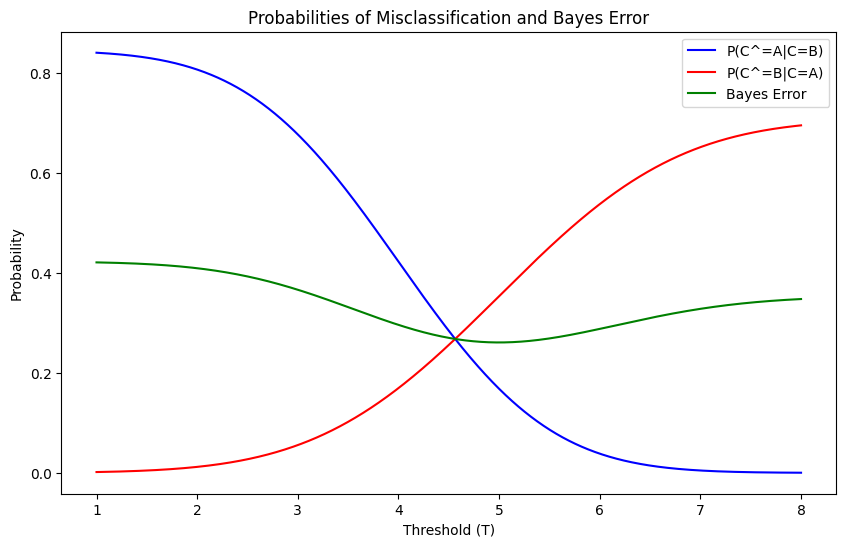

In [ ]:
# Plotting the misclassification probabilities and Bayes error

plt.figure(figsize=(10, 6))
plt.plot(T_values, probCpA_B, label='P(C^=A|C=B)', color='blue')
plt.plot(T_values, probCpB_A, label='P(C^=B|C=A)', color='red')
plt.plot(T_values, bayes_error, label='Bayes Error', color='green')
plt.xlabel('Threshold (T)')
plt.ylabel('Probability')
plt.title('Probabilities of Misclassification and Bayes Error')
plt.legend()
plt.show()

From the above plot, we see the curves (blue and red) for the two misclassifications and the curve (green) for bayes error which is the average of the two misclassifications.

Part c)

In [ ]:
# Generating type A and type B beans

np.random.seed(42)
beans_typeA = np.random.normal(loc=5, scale=2, size=5000)
beans_typeB = np.random.normal(loc=4, scale=1.4, size=5000)

We've generated 5000 beans for both types A and B using the normal distribution with the given means and standard deviations.

In [ ]:
# Again generating 1000 threshold (T) values

T_values = np.linspace(1, 8, 1000)

In [ ]:
# Creating a function for our classifier

def classifier(beans, T):
    return np.where(beans >= T, 'A', 'B')

We've now defined our classifier which classifies beans with weights >= T as type A and < T as type B

In [ ]:
# Calculating the misclassifications for each T value

misclassified_B_as_A_rates = []
misclassified_A_as_B_rates = []
for T in T_values:
    misclassified_B_as_A = np.sum(classifier(beans_typeB, T) == 'A')
    misclassified_A_as_B = np.sum(classifier(beans_typeA, T) == 'B')
    misclassified_B_as_A_rates.append(misclassified_B_as_A / 5000)
    misclassified_A_as_B_rates.append(misclassified_A_as_B / 5000) 
    

We sum up the beans in beans_typeA and beans_typeB arrays that were wrongly classified as 'B' and 'A' respectively. We divide them by 5000 which is the total # of type A beans and type B beans each.

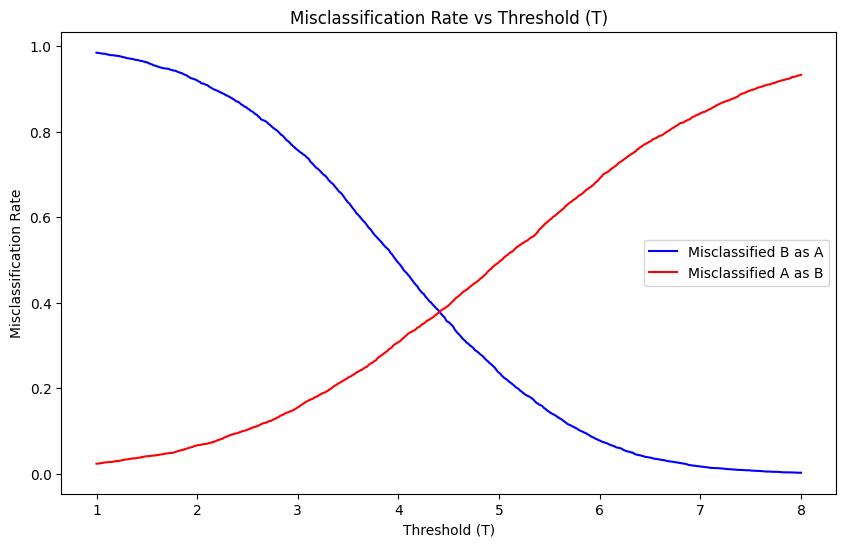

In [ ]:
# Plotting the misclassification rates

plt.figure(figsize=(10, 6))
plt.plot(T_values, misclassified_B_as_A_rates, label='Misclassified B as A', color='blue')
plt.plot(T_values, misclassified_A_as_B_rates, label='Misclassified A as B', color='red')
plt.xlabel('Threshold (T)')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs Threshold (T)')
plt.legend()
plt.show()

Hence, our plot above closely matches the plot from part b).